In [67]:
#part 1 : "preapring dataset for analyze"
#importing pnandas module 
try :
    import pandas as pd
except :
    print('something wrong when importing')

In [68]:
#loading the base file and make a copy of it 
file = pd.read_csv('D:\\datasets\\digikala_orders\\orders.csv')
df = file.copy()
#get 10 sample of our dataset randomly
df.sample(10)

,ID_Order,ID_Customer,ID_Items,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
87749,6662563,3551264,274646,2017-03-08 14:07:28.000,1743119.0,تهران,1.0
178710,4473460,3305705,20411,2016-07-16 16:40:46.000,1059174.0,کرمانشاه,1.0
123637,5476939,3719138,238152,2016-11-16 01:05:58.000,385321.0,تهران,1.0
82692,12034162,2986257,239237,2018-03-25 11:31:22.000,1183486.0,تهران,1.0
67413,23124378,1432632,227407,2018-10-07 16:52:50.000,4688073.0,تهران,1.0
75182,2409907,2972887,76504,2015-08-11 20:22:29.000,18348.0,قم,14.0
65301,10769596,6309577,418334,2018-01-23 17:26:35.000,450000.0,تهران,1.0
180748,3966039,3318975,21939,2016-05-07 08:57:12.000,302752.0,تهران,1.0
46717,1581665,855240,39179,2014-12-16 22:49:27.000,16198889.0,پیشوا,1.0
150521,10125332,1107535,143130,2017-12-20 11:06:34.000,7890.0,تهران,5.0


In [69]:
#getting information from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Order               200000 non-null  int64  
 1   ID_Customer            200000 non-null  int64  
 2   ID_Items               200000 non-null  int64  
 3   DateTime_CartFinalize  200000 non-null  object 
 4   Amount_Gross_Order     200000 non-null  float64
 5   city_name_fa           200000 non-null  object 
 6   Quantity_item          200000 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 10.7+ MB


In [70]:
#droping "ID_Order" column from the dataset
df = df.drop(['ID_Order'],axis=1)
df.head()

,ID_Customer,ID_Items,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [71]:
#seperating "DateTime_CartFinalize" column to year , month , day and time
year = list()
month = list()
day = list()
time = list()
for i in df['DateTime_CartFinalize'] :
    val = i.split()
    date = val[0].split('-')
    clock = val[1].split(':')
    year.append(int(date[0]))
    if date[1][0] == '0' :
        month.append(int(date[1][1]))
    else :
        month.append(int(date[1]))
    if date[2][0] == '0' :
        day.append(int(date[2][1]))
    else :
        day.append(int(date[2]))
    t = clock[0]+clock[1]
    time.append(t)
year_df = pd.DataFrame(year,columns=['year'])
month_df = pd.DataFrame(month,columns=['month'])
day_df = pd.DataFrame(day,columns=['day'])
time_df = pd.DataFrame(time,columns=['time'])
df = df.drop(['DateTime_CartFinalize'],axis=1)
new_df = pd.concat([df,year_df,month_df,day_df,time_df],axis=1)
new_df.sample(10)

,ID_Customer,ID_Items,Amount_Gross_Order,city_name_fa,Quantity_item,year,month,day,time
27018,5402359,89752,2770642.0,تهران,1.0,2017,7,31,1634
169194,3222195,776411,290000.0,اسلام آباد غرب,1.0,2018,2,20,1856
2135,792995,649419,260000.0,تهران,1.0,2018,2,5,1407
19361,3092255,162933,311926.0,زرین شهر,3.0,2016,6,12,1504
128540,4143269,315261,522936.0,نسیم شهر,1.0,2017,12,26,0148
120176,7258811,808881,541284.0,تهران,1.0,2018,5,28,1814
20061,2825693,141791,10000.0,مشهد,1.0,2016,6,6,2231
55598,3111577,1335150,80000.0,تهران,1.0,2018,8,12,1140
9801,3704089,159660,137615.0,تهران,1.0,2017,8,28,2134
138274,6356327,407200,890000.0,جهرم,1.0,2018,8,6,1938


In [72]:
#get information from the new dataframe
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID_Customer         200000 non-null  int64  
 1   ID_Items            200000 non-null  int64  
 2   Amount_Gross_Order  200000 non-null  float64
 3   city_name_fa        200000 non-null  object 
 4   Quantity_item       200000 non-null  float64
 5   year                200000 non-null  int64  
 6   month               200000 non-null  int64  
 7   day                 200000 non-null  int64  
 8   time                200000 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 13.7+ MB


In [73]:
#end of part 1

In [74]:
#part 2 : "data analyze"
from_year = min(new_df['year'])
to_year = max(new_df['year'])
#total sale of digikala
print(f'total sale of digikala is {int(sum(new_df["Amount_Gross_Order"]))} toman for number of {int(sum(new_df["Quantity_item"]))} stuff selling from {from_year} to {to_year}')

total sale of digikala is 291640808763 toman for number of 252245 stuff selling from 2013 to 2018


In [75]:
#total yearly sale of digikala
for y in sorted(list(set(new_df['year']))) :
    tem_df = new_df[new_df['year']==y]
    print(f'total sale of digikala in {y} is {int(sum(tem_df["Amount_Gross_Order"]))} toman for number of {int(sum(tem_df["Quantity_item"]))} stuff selling\n-----------------------------------------------------')

total sale of digikala in 2013 is 1213148584 toman for number of 313 stuff selling
-----------------------------------------------------
total sale of digikala in 2014 is 13289856116 toman for number of 4605 stuff selling
-----------------------------------------------------
total sale of digikala in 2015 is 32751238135 toman for number of 22926 stuff selling
-----------------------------------------------------
total sale of digikala in 2016 is 53899257903 toman for number of 50548 stuff selling
-----------------------------------------------------
total sale of digikala in 2017 is 86812584003 toman for number of 78389 stuff selling
-----------------------------------------------------
total sale of digikala in 2018 is 103674724022 toman for number of 95464 stuff selling
-----------------------------------------------------


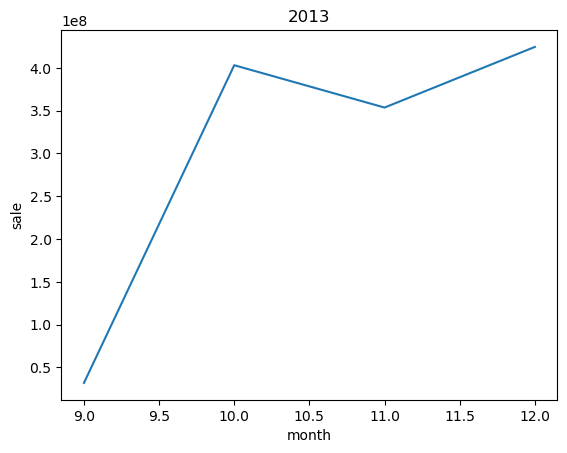

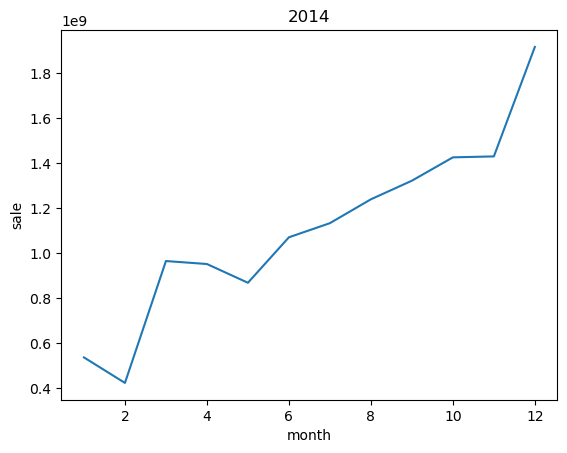

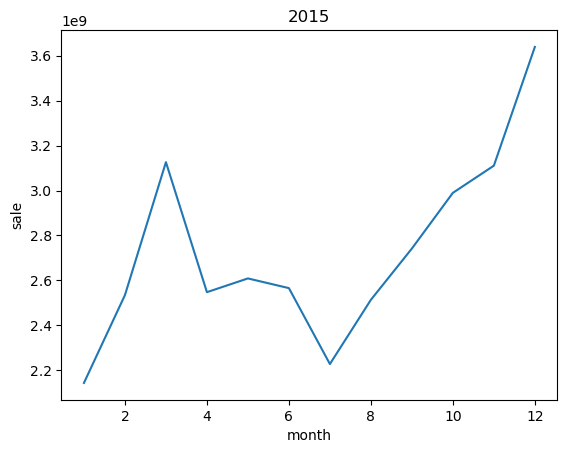

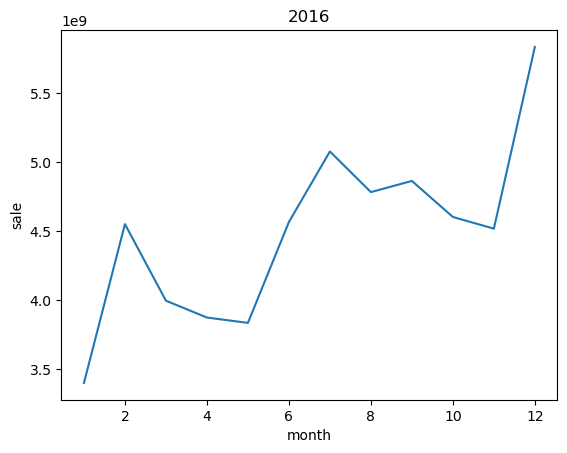

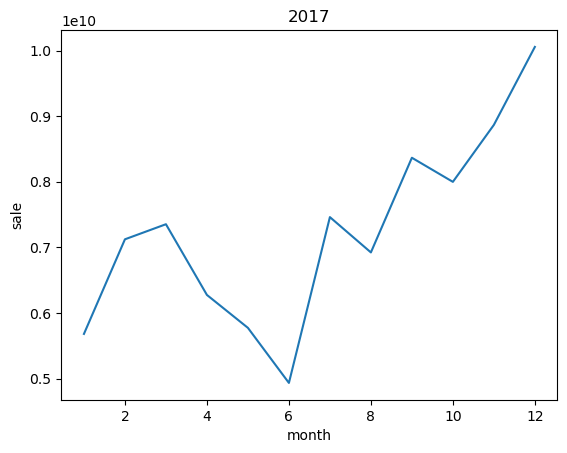

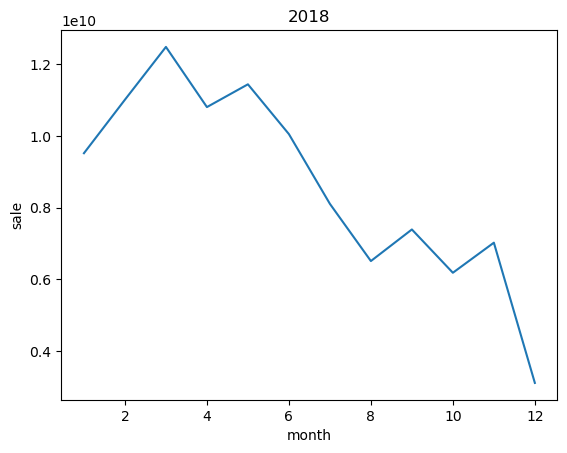

In [76]:
#yearly sale of digikala by a plot
#importing needed module
import matplotlib.pyplot as plt
monthly_sale = []
for y in sorted(list(set(new_df['year']))) :
    temp_df = new_df[new_df['year']==y]
    for m in sorted(list(set(temp_df['month']))) :
        temp_df2 = temp_df[temp_df['month']==m]
        monthly_sale.append(sum(temp_df2['Amount_Gross_Order']))
    plt.title(f'{y}')
    plt.xlabel('month')
    plt.ylabel('sale')
    plt.plot(sorted(list(set(temp_df['month']))),monthly_sale)
    plt.show()
    monthly_sale = []

In [77]:
#finding that customer with most buy and number of orders
ID_Customer = list()
customer_buy = list()
customer_items = list()
for c in list(set(new_df['ID_Customer'])) :
    temp_df = new_df[new_df['ID_Customer']==c]
    ID_Customer.append(c)
    buy = sum(temp_df['Amount_Gross_Order'])
    customer_buy.append(buy)
    customer_items.append(sum(temp_df['Quantity_item']))
customer_df = pd.DataFrame(ID_Customer,columns=['customer id'])
buy_df = pd.DataFrame(customer_buy,columns=['amount of buy'])
item_df = pd.DataFrame(customer_items,columns=['amount of items'])
finall_df = pd.concat([customer_df,buy_df,item_df],axis=1)
max_buy = max(customer_buy)
max_item = max(customer_items)
print(f'that customers with most buy from digikala from {from_year} to {to_year} :\n')
print(finall_df[finall_df['amount of buy']==max_buy])
print('---------------------------------------------------------')
print(f'that customers with most item orders from digikala from {from_year} to {to_year} :\n')
print(finall_df[finall_df['amount of items']==max_item])

that customers with most buy from digikala from 2013 to 2018 :

       customer id  amount of buy  amount of items
70006       643657   1.530359e+09              5.0
---------------------------------------------------------
that customers with most item orders from digikala from 2013 to 2018 :

       customer id  amount of buy  amount of items
35847       586941     19854313.0            506.0


In [78]:
#finding most expensive stuff
temp_df = new_df[new_df['Quantity_item']==1]
expensive = max(temp_df['Amount_Gross_Order'])
print(f'most expensive stuff from {from_year} to {to_year} :\n')
temp_df = temp_df[temp_df['Amount_Gross_Order']==expensive]
for i in  temp_df['ID_Items'] :
    print('id itme :',i)
    print('price :',expensive)

most expensive stuff from 2013 to 2018 :

id itme : 428330
price : 1530000000.0


In [79]:
#finding most popular item
items = list()
ID = list()
for i in list(set(new_df['ID_Items'])) :
    temp_df = new_df[new_df["ID_Items"]==i]
    ID.append(i)
    items.append(sum(temp_df['Quantity_item']))
most_sell = max(items)
print('most popular items by number of buying from different csutomers :')
idx = 0
for i in items :
    if i == most_sell :
       print(f'most popular item is : {ID[idx]} with {int(most_sell)} of selling')
    idx+=1

most popular items by number of buying from different csutomers :
most popular item is : 143130 with 996 of selling


enter your city name :تهران
total sale of تهران from 2013 to 2018 is :
 
       total sale   city
136  1.527431e+11  تهران


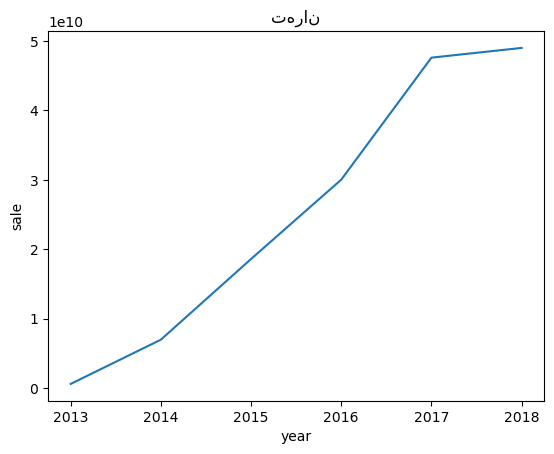

enter your city name :کرمان
total sale of کرمان from 2013 to 2018 is :
 
       total sale   city
682  2.121964e+09  کرمان


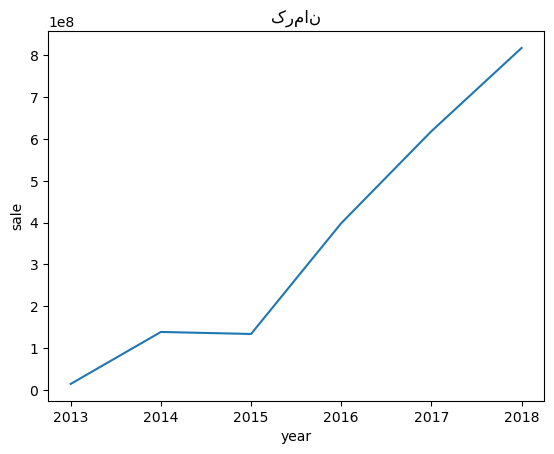

enter your city name :مشهد
total sale of مشهد from 2013 to 2018 is :
 
       total sale  city
776  8.714945e+09  مشهد


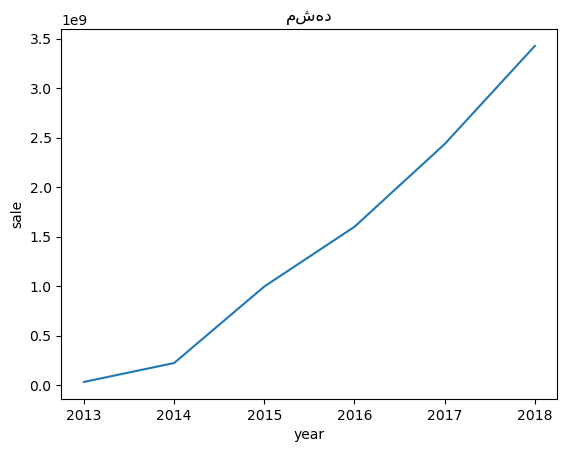

enter your city name :جهرم
total sale of جهرم from 2013 to 2018 is :
 
      total sale  city
118  252267188.0  جهرم


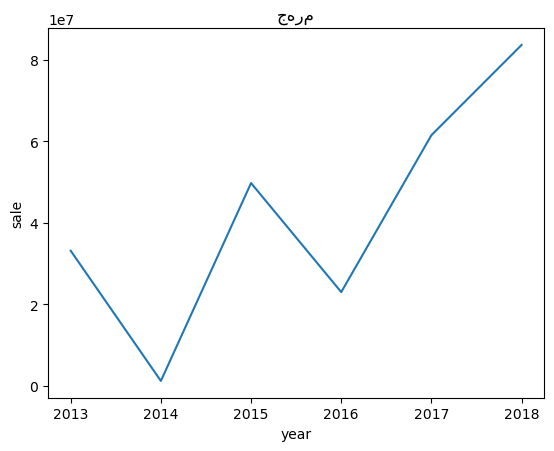

enter your city name :


In [80]:
#total sale of each city by numeric and a plot
sell = list()
city = list()
for c in list(set(new_df['city_name_fa'])) :
    temp_df = new_df[new_df['city_name_fa']==c]
    sell.append(sum(temp_df['Amount_Gross_Order']))
    city.append(c)
sell_df = pd.DataFrame(sell,columns=['total sale'])
city_df = pd.DataFrame(city,columns=['city'])
finall_df = pd.concat([sell_df,city_df],axis=1)
while ask:=input('enter your city name :') :
        for c in finall_df['city'] :
            if c == ask :
                print(f'total sale of {ask} from {from_year} to {to_year} is :\n ')
                print(finall_df[finall_df['city']==ask])
                break
        year_sale = []
        for y in sorted(list(set(new_df['year']))) :
            temp_df = new_df[new_df['year']==y]
            temp_df2 = temp_df[temp_df['city_name_fa']==ask]
            year_sale.append(sum(temp_df2['Amount_Gross_Order']))
        plt.title(f'{ask}')
        plt.xlabel('year')
        plt.ylabel('sale')
        plt.plot(sorted(list(set(new_df['year']))),year_sale)
        plt.show()
        year_sale = []

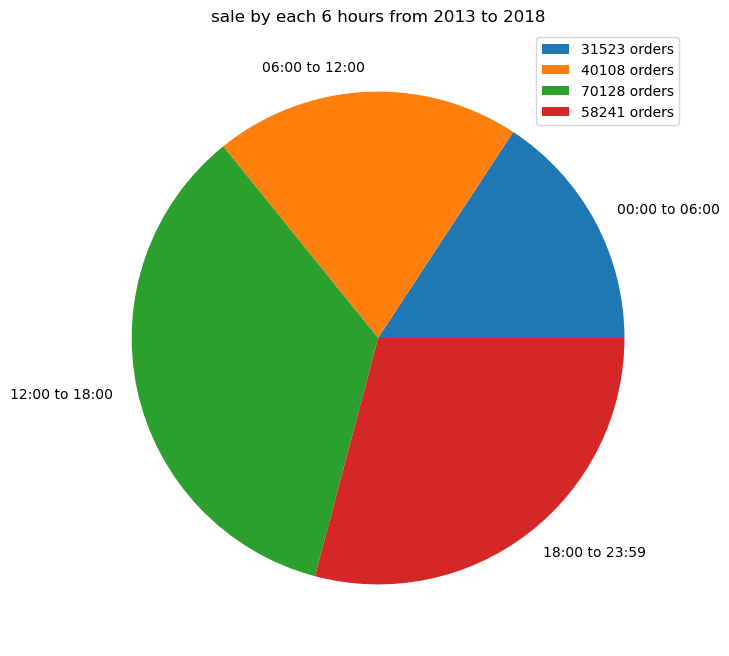

In [81]:
#showing amount of orders every 6 hours by a pie plot
def calculate_time()->list :
    '''function docstring'''
    unique_time = sorted(list(new_df['time']))
    parts  =list()
    first = 0
    second = 0
    third = 0
    fourth = 0
    for t in unique_time :
        if t == '0601' :
            parts.append(first)
            idx = unique_time.index(t)
            break
        else :
            first +=1
    for i in unique_time[idx:] :
        if i == '1201' :
            parts.append(second)
            idx = unique_time.index(i)
            break
        else :
            second += 1
    for j in unique_time[idx:] :
        if j == '1801' :
            parts.append(third)
            idx = unique_time.index(j)
            break
        else :
            third += 1
    for h in unique_time[idx:] :
        fourth += 1
    parts.append(fourth)
    return parts
plt.figure(figsize=(8,8))
plt.title(f'sale by each 6 hours from {from_year} to {to_year}')
plt.pie(calculate_time(),labels=['00:00 to 06:00','06:00 to 12:00','12:00 to 18:00','18:00 to 23:59'])
plt.legend([f'{calculate_time()[0]} orders',f'{calculate_time()[1]} orders',f'{calculate_time()[2]} orders',f'{calculate_time()[3]} orders'])
plt.show()

In [82]:
#end of part 2 and the project